# **Clustering DC-08 Ai Learning Insight**

## **Deskripsi**

Pada file ini akan dilakukan .. **isi yak**

## **Informasi Dataset**

dataset ini menyajikan hasil dari **isi yak**

## Fitur Utama
fungsi kolom...

## **1. Import Library**

In [ ]:
# Library untuk melakukan analisis data
import pandas as pd
import numpy as np

# Library untuk melakukan visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk melakukan perhitungdan dan iterasi
import math
from scipy.stats import zscore
import pandas.api.types

# Tools untuk melakukan Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Library untuk melakukan preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Menyimpan Model
import joblib

## **2. Load Dataset**

In [ ]:
# Load data
df= pd.read_csv("df_record_full.csv")

# Load data
df.head()

/tmp/ipython-input-189511680.py:2: DtypeWarning: Columns (5,7,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("df_record_full.csv")


,id,journey_id,tutorial_id,user_id,status,last_viewed,first_opened_at,completed_at,last_activity_date,time_to_complete_hours,...,submission_duration,enrolling_times,study_duration,avg_submission_rating,exam_registration_id,score,is_passed,total_questions,exam_finished_at,exam_status
0,266063,26,599,96989,1,2017-05-26 21:34:00,NaN,NaN,2017-05-26 21:34:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,362382,26,602,96989,0,2017-05-26 21:35:00,NaN,NaN,2017-05-26 21:35:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2313738,32,1152,96989,1,NaN,2018-08-29 11:19:00,NaN,2018-08-29 11:19:00,NaN,...,0,3.0,44.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN
3,2313738,32,1152,96989,1,NaN,2018-08-29 11:19:00,NaN,2018-08-29 11:19:00,NaN,...,0,3.0,44.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN
4,2314290,32,719,96989,1,NaN,2018-08-29 11:32:00,NaN,2018-08-29 11:32:00,NaN,...,0,3.0,44.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cek tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318011 entries, 0 to 318010
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      318011 non-null  int64  
 1   journey_id              318011 non-null  int64  
 2   tutorial_id             318011 non-null  int64  
 3   user_id                 318011 non-null  int64  
 4   status                  318011 non-null  int64  
 5   last_viewed             27386 non-null   object 
 6   first_opened_at         242262 non-null  object 
 7   completed_at            21970 non-null   object 
 8   last_activity_date      252188 non-null  object 
 9   time_to_complete_hours  18458 non-null   float64
 10  display_name            318011 non-null  object 
 11  name                    318011 non-null  object 
 12  email                   318011 non-null  object 
 13  phone                   317969 non-null  float64
 14  journey_name        

In [ ]:
# Cek deskripsi kolom
df.describe()

,id,journey_id,tutorial_id,user_id,status,time_to_complete_hours,phone,difficulty,hours_to_study,type,...,submission_status,rating,enrolling_times,study_duration,avg_submission_rating,exam_registration_id,score,is_passed,total_questions,exam_status
count,3.180110e+05,318011.000000,318011.000000,3.180110e+05,318011.000000,18458.000000,3.179690e+05,317964.000000,317964.000000,317964.000000,...,259973.000000,259973.000000,284280.000000,282774.000000,244413.000000,4.346700e+04,43467.000000,43467.000000,43467.000000,43467.0
mean,2.196745e+08,262.561669,17686.067230,8.243214e+05,0.981664,1110.813248,7.321468e+12,0.234961,69.232605,1.036026,...,-0.201613,1.794282,1.370870,128.566672,4.079975,3.230081e+07,74.910415,0.691053,6.312720,2.0
std,1.447244e+08,173.923115,11704.458005,8.913021e+05,0.134163,4249.654461,1.116871e+13,0.649191,34.400856,0.307995,...,1.055549,2.154818,0.664514,200.300038,0.739649,1.795015e+07,27.761996,0.462065,7.857875,0.0
min,7.781000e+03,2.000000,1.000000,3.390000e+03,0.000000,0.000000,6.281669e+10,0.000000,0.000000,1.000000,...,-2.000000,0.000000,1.000000,0.000000,0.000000,3.825000e+03,0.000000,0.000000,1.000000,2.0
25%,1.004418e+08,163.000000,9191.000000,1.025560e+05,1.000000,0.000000,6.282148e+12,0.000000,45.000000,1.000000,...,-1.000000,0.000000,1.000000,21.000000,3.600000,1.624993e+07,50.000000,0.000000,4.000000,2.0
50%,1.922236e+08,219.000000,16210.000000,5.312590e+05,1.000000,0.016667,6.282384e+12,0.000000,80.000000,1.000000,...,-1.000000,0.000000,1.000000,57.000000,4.000000,3.732224e+07,80.000000,1.000000,4.000000,2.0
75%,3.579857e+08,319.000000,25245.000000,1.202367e+06,1.000000,38.495833,6.285159e+12,0.000000,82.000000,1.000000,...,1.000000,4.000000,2.000000,110.000000,5.000000,4.921837e+07,100.000000,1.000000,5.000000,2.0
max,4.574840e+08,905.000000,45725.000000,5.410865e+06,1.000000,52702.333333,6.289562e+13,3.000000,150.000000,4.000000,...,1.000000,5.000000,9.000000,993.000000,5.000000,5.726779e+07,100.000000,1.000000,100.000000,2.0


## **3. Exploratory Data Analysis (EDA)**

### Distribusi Fitur Numerik (Histogram)

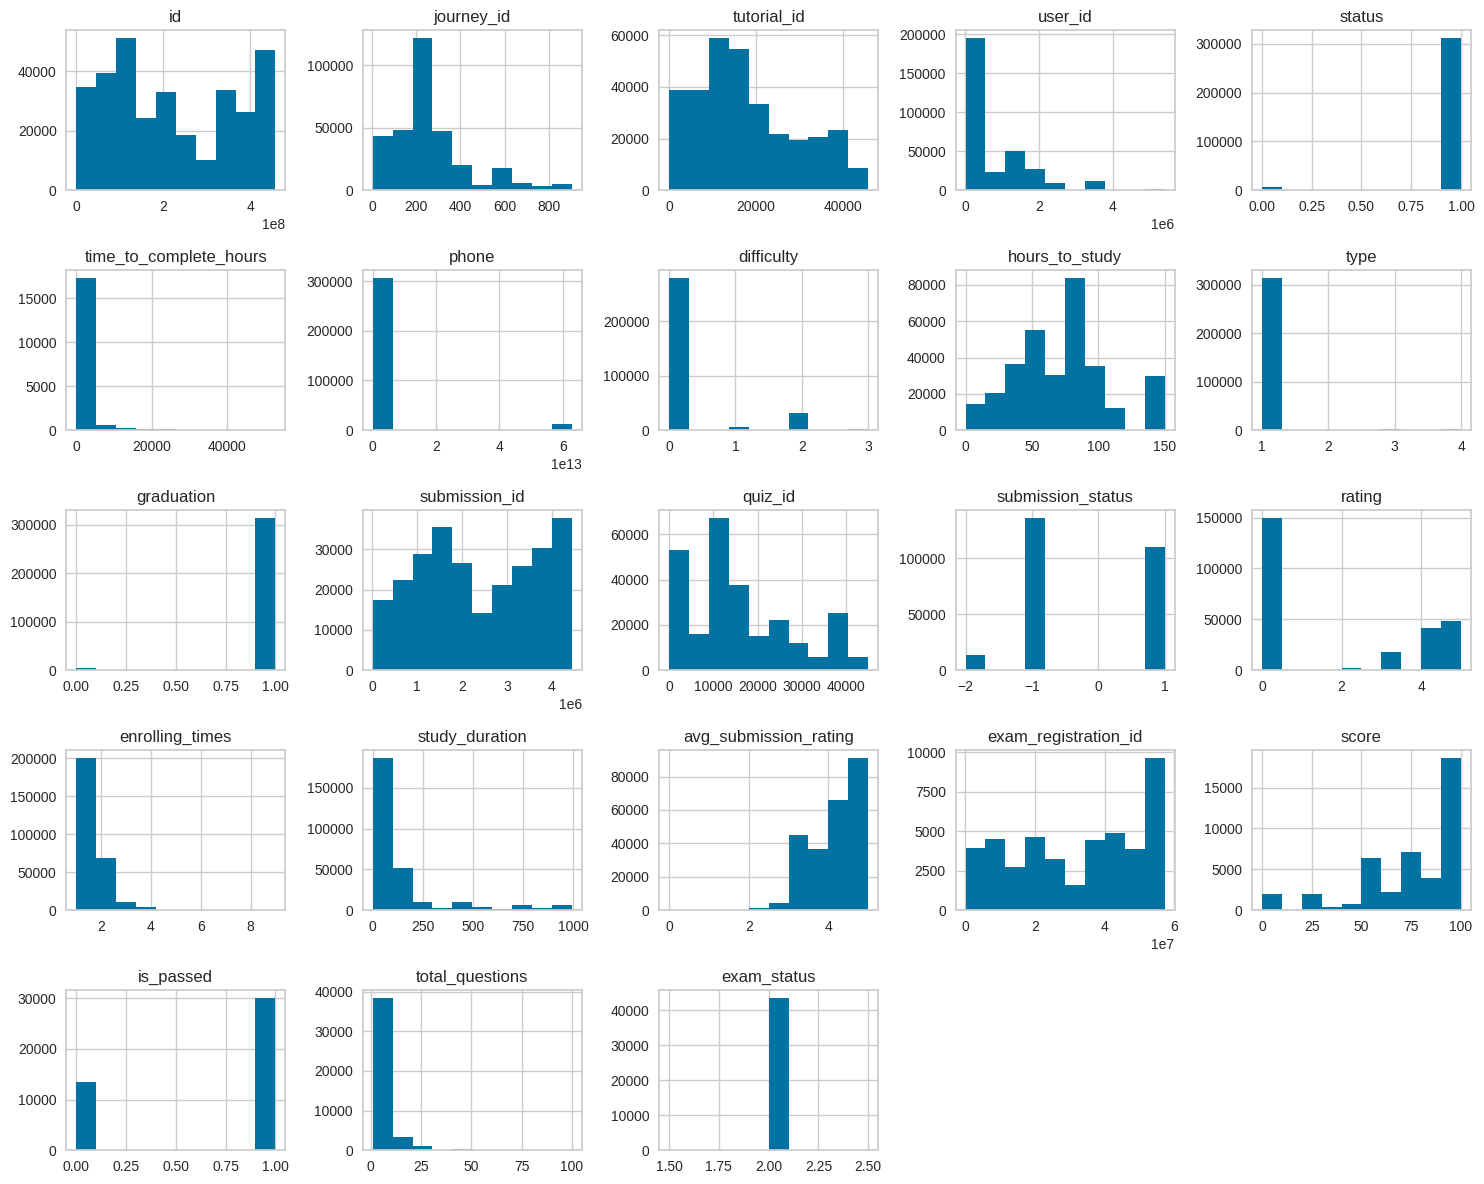

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(15, 12), bins=10)
plt.tight_layout()
plt.show()

### Korelasi antar fitur (Heatmap)

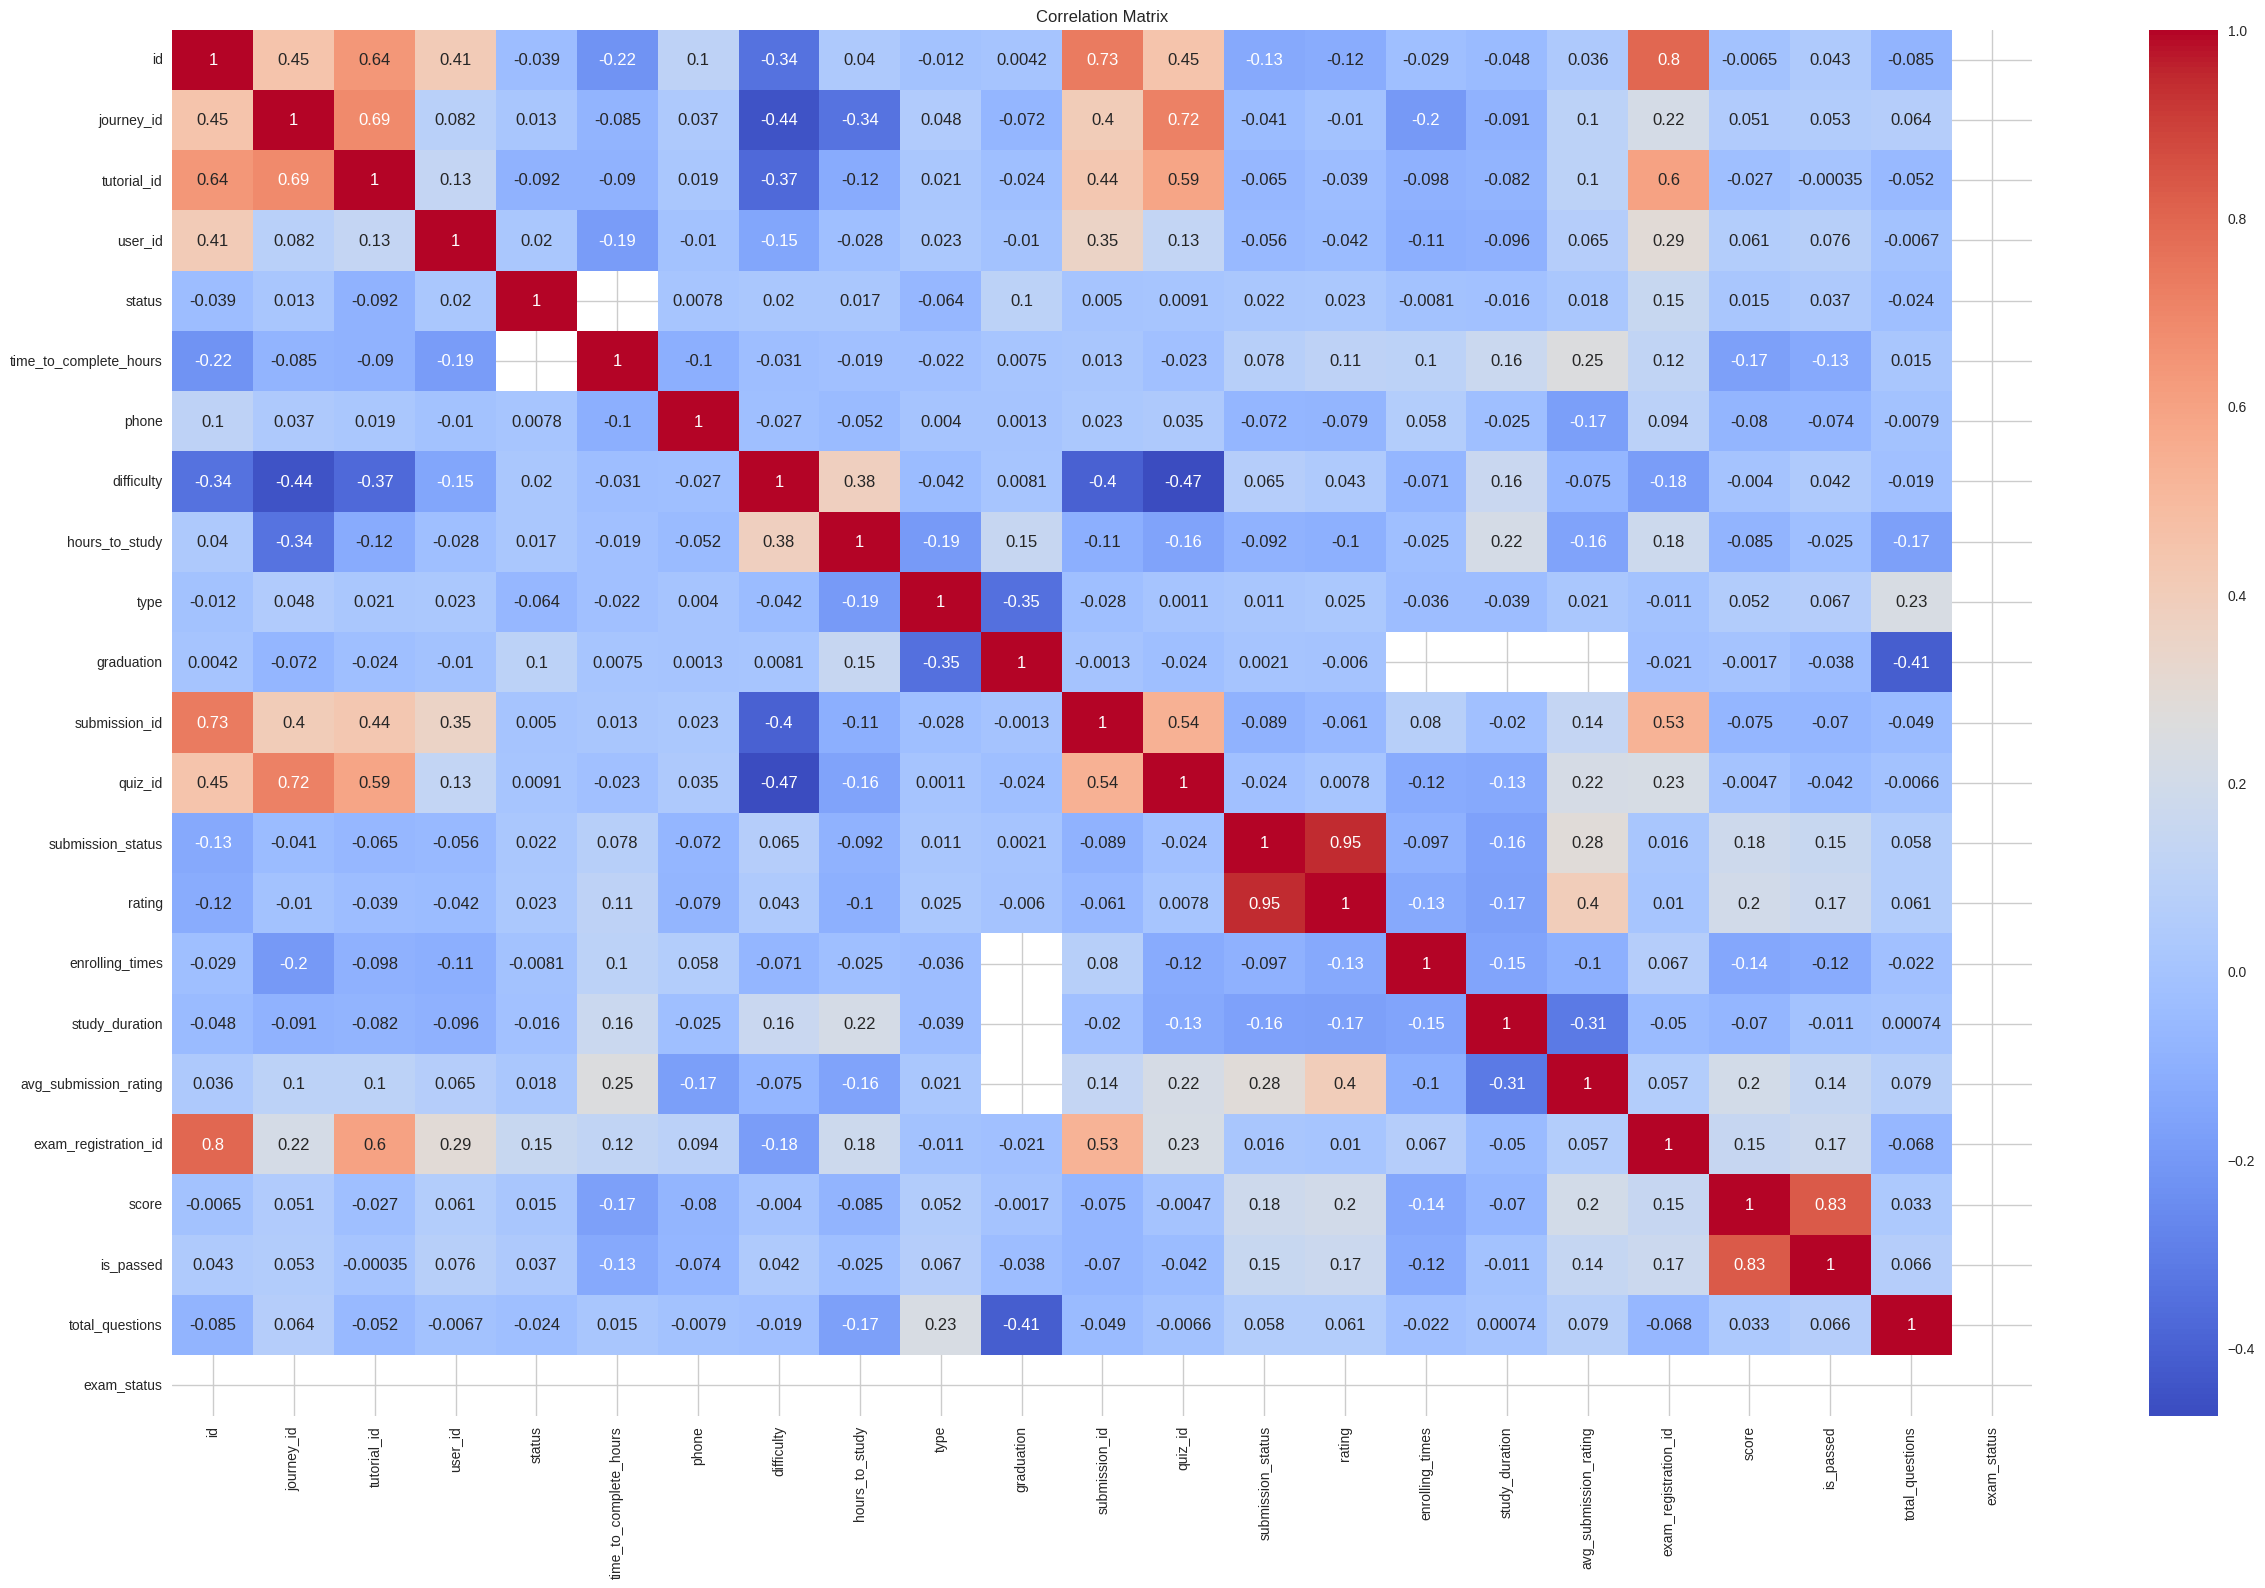

In [ ]:
plt.figure(figsize=(30, 18))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Outlier Check (Boxplot)

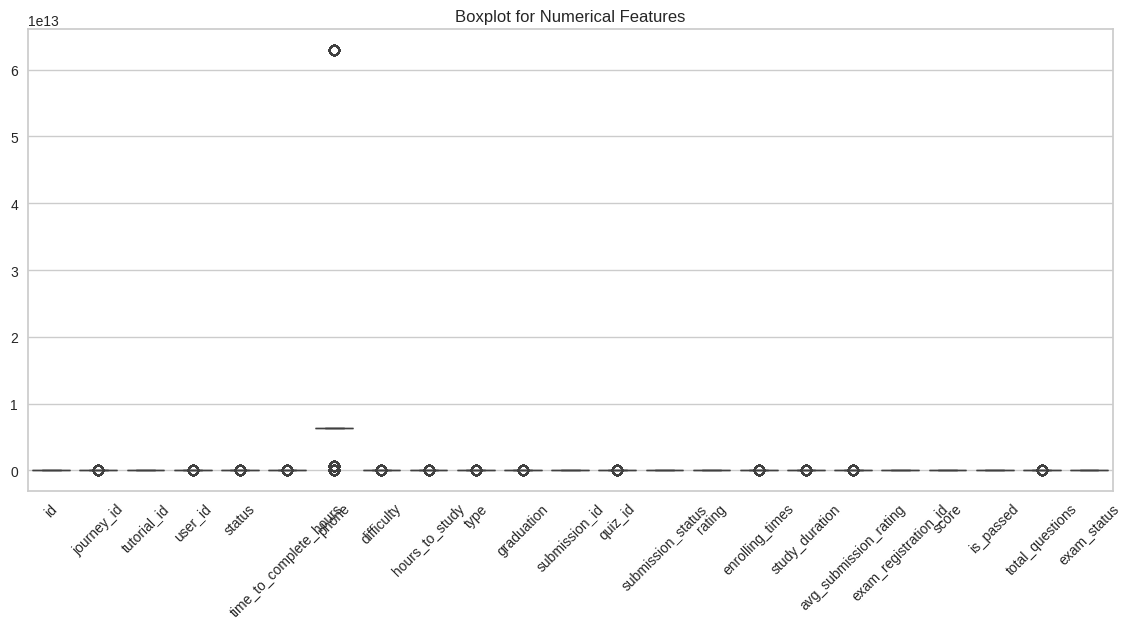

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features")
plt.show()


## **3. Preprocessing Data**

### Paring Date Column

In [ ]:
date_cols = [
    "first_opened_at",
    "completed_at",
    "last_viewed",
    "last_activity_date"
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

### MEncari data yang Valid


In [ ]:
df = df[
    (df["first_opened_at"].notna()) |
    (df["completed_at"].notna())
]

### Handling outlier

In [ ]:
df = df[
    (df["time_to_complete_hours"].isna()) |
    ((df["time_to_complete_hours"] >= 0) &
     (df["time_to_complete_hours"] <= 24))
]

### Membuang Kolom yang tidak dibutuhkan

In [ ]:
cols_to_drop = [
    # Semua ID & identitas
    "id", "journey_id", "tutorial_id", "submission_id", "quiz_id",
    "exam_registration_id", "user_id",

    # Identitas pribadi
    "display_name", "name", "email", "phone",

    # Metadata kelas
    "journey_name", "difficulty", "hours_to_study",
    "type", "graduation",

    # Status kategori mentah
    "submission_status", "exam_status"
]

df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

### Membuat Kolom Baru

In [ ]:
# Ambil tanggal saja (tanpa jam)
df["activity_date"] = df["completed_at"].fillna(df["first_opened_at"]).dt.date

### Feature Engineering

In [ ]:
# Apakah modul selesai
df["is_completed"] = (df["status"] == 1).astype(int)

# Apakah modul diulang (dibuka lebih dari 1x oleh user yang sama)
repeat_check = (
    df.groupby(["user_id", "tutorial_id"])
      .size()
      .reset_index(name="open_count")
)

df = df.merge(repeat_check, on=["user_id", "tutorial_id"], how="left")

df["is_repeat"] = (df["open_count"] > 1).astype(int)


### Aggregasi Setiap User

In [ ]:
df_features_cluster = df.groupby("user_id").agg(

    # --- FAST LEARNER ---
    avg_time_to_complete = ("time_to_complete_hours", "mean"),
    total_completed_modules = ("is_completed", "sum"),

    # --- CONSISTENT LEARNER ---
    active_days = ("activity_date", "nunique"),
    total_activities = ("activity_date", "count"),

    # --- REFLECTIVE LEARNER ---
    repeat_ratio = ("is_repeat", "mean"),


    avg_submission_rating = ("rating", "mean"),
    avg_exam_score = ("score", "mean"),
    exam_pass_rate = ("is_passed", "mean")

).reset_index()

### Membersihkan Hasil Aggregasi

In [ ]:
df_features_cluster = df_features_cluster.replace([np.inf, -np.inf], np.nan)

df_features_cluster = df_features_cluster.fillna(0)

### Cek Hasil duls

In [ ]:
df_features_cluster.info()
df_features_cluster.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  31 non-null     int64  
 1   avg_time_to_complete     31 non-null     float64
 2   total_completed_modules  31 non-null     int64  
 3   active_days              31 non-null     int64  
 4   total_activities         31 non-null     int64  
 5   repeat_ratio             31 non-null     float64
 6   avg_submission_rating    31 non-null     float64
 7   avg_exam_score           31 non-null     float64
 8   exam_pass_rate           31 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 2.3 KB


,user_id,avg_time_to_complete,total_completed_modules,active_days,total_activities,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate
0,3390,0.226649,11614,230,11691,0.817295,1.620495,79.915323,0.788978
1,5774,1.583095,2061,94,2103,0.172611,1.723022,70.225397,0.609524
2,11836,1.392633,2868,104,2933,0.594613,1.681967,85.585965,0.915789
3,17833,0.513218,7484,198,7537,0.824997,3.023378,83.822018,0.856881
4,32258,2.332081,8028,235,8087,0.805614,2.538160,84.257925,0.841499


### MEnghapus Salah Satu Kolom Activities

In [ ]:
df_features_cluster = df_features_cluster.drop(columns=["total_activities"])


### Cek Distribusi Cluster

In [ ]:
df_features_cluster.drop(columns=["user_id"]).describe()


,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.634342,7655.258065,134.967742,0.630280,1.866994,74.521721,0.728207
std,0.696268,9107.275795,80.284280,0.285166,1.215985,22.008285,0.242832
min,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066537,2464.500000,91.000000,0.506688,0.933004,69.634293,0.622944
50%,0.300740,5548.000000,149.000000,0.721750,1.723022,81.632675,0.808989
75%,1.043079,9138.000000,200.500000,0.832035,2.781019,85.316792,0.868140
max,2.332081,40861.000000,263.000000,0.946841,4.246051,93.805405,1.000000


### Melakukan Standarrd Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pisahkan feature dan ID
X = df_features_cluster.drop(columns=["user_id"])
user_ids = df_features_cluster["user_id"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns
)

# Tambahkan kembali user_id
df_scaled["user_id"] = user_ids.values

df_scaled.head()


,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate,user_id
0,-0.595220,0.441864,1.203264,0.666655,-0.206066,0.249122,0.254399,3390
1,1.385150,-0.624416,-0.518718,-1.631454,-0.120357,-0.198441,-0.496826,5774
2,1.107081,-0.534341,-0.392102,-0.127141,-0.154677,0.511041,0.785249,11836
3,-0.176837,-0.019115,0.798091,0.694108,0.966706,0.429567,0.538648,17833
4,2.478646,0.041604,1.266572,0.625014,0.561077,0.449701,0.474256,32258


In [ ]:
df_scaled.drop(columns=["user_id"]).describe()

,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,2.148819e-17,3.939501e-17,-4.297638e-17,5.013910e-16,-2.721837e-16,-4.297638e-16,-1.432546e-17
std,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00,1.016530e+00
min,-9.261206e-01,-8.533435e-01,-1.696250e+00,-2.246759e+00,-1.560756e+00,-3.442048e+00,-3.048385e+00
25%,-8.289786e-01,-5.793787e-01,-5.567034e-01,-4.405667e-01,-7.807899e-01,-2.257430e-01,-4.406478e-01
50%,-4.870496e-01,-2.352066e-01,1.776713e-01,3.260663e-01,-1.203568e-01,3.284444e-01,3.381650e-01
75%,5.967428e-01,1.654997e-01,8.297454e-01,7.191966e-01,7.641000e-01,4.986083e-01,5.857791e-01
max,2.478646e+00,3.706337e+00,1.621097e+00,1.128445e+00,1.988827e+00,8.906848e-01,1.137767e+00


## **3. Membuat Model CLustering**

### Melakukan visualisasi Elbow Method

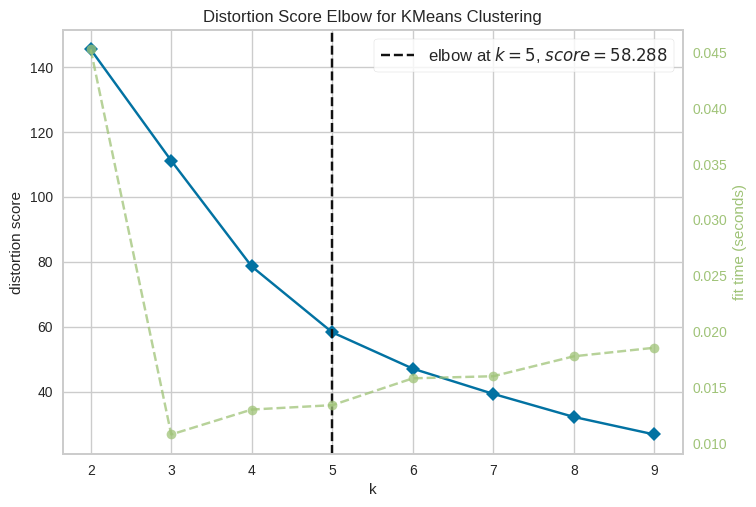

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_kmeans = KMeans(random_state=42, n_init=10)

X_kmeans = df_scaled.drop(columns=["user_id"])

visualizer = KElbowVisualizer(
    model_kmeans,
    k=(2, 10),
    metric='distortion'
)

visualizer.fit(X_kmeans)
visualizer.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(X_kmeans)

sil_score_3 = silhouette_score(X_kmeans, labels_3)
print(f"Silhouette Score (k=3) = {sil_score_3:.3f}")


Silhouette Score (k=3) = 0.466


### Menggunakan PCA sebelum Clustering

In [ ]:
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_kmeans)

print("Explained variance ratio:", pca3.explained_variance_ratio_)
print("Total explained variance:", pca3.explained_variance_ratio_.sum())

Explained variance ratio: [0.46433422 0.24706265 0.13850562]
Total explained variance: 0.8499024883551617


### Interpretasi CLustre

In [ ]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X_kmeans)

# tempel ke df_features_cluster
df_features_cluster["cluster"] = labels

In [ ]:
df_features_cluster["cluster"].value_counts()
df_features_cluster.head()


,user_id,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate,cluster
0,3390,0.226649,11614,230,0.817295,1.620495,79.915323,0.788978,1
1,5774,1.583095,2061,94,0.172611,1.723022,70.225397,0.609524,1
2,11836,1.392633,2868,104,0.594613,1.681967,85.585965,0.915789,1
3,17833,0.513218,7484,198,0.824997,3.023378,83.822018,0.856881,1
4,32258,2.332081,8028,235,0.805614,2.538160,84.257925,0.841499,1


In [ ]:
cluster_profile = df_features_cluster.groupby("cluster").mean()
cluster_profile

,user_id,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate
cluster,,,,,,,,
0,8.668130e+05,0.322060,38090.5,193.500000,0.936902,0.527211,60.828983,0.495314
1,1.446359e+06,0.704463,5967.0,140.555556,0.654254,2.104533,81.056125,0.799400
2,5.296252e+06,0.000000,11.5,1.000000,0.000000,0.000000,0.000000,0.000000


## **6. Mapping Hasil CLister**

In [ ]:
mapping_cluster = {
    0: "Fast Learner",
    1: "Consistent Learner",
    2: "Reflective Learner"
}

df_features_cluster["learner_type"] = df_features_cluster["cluster"].map(mapping_cluster)


In [ ]:
df_features_cluster["learner_type"].value_counts()
df_features_cluster[["user_id", "cluster", "learner_type"]].head(40)


,user_id,cluster,learner_type
0,3390,1,Consistent Learner
1,5774,1,Consistent Learner
2,11836,1,Consistent Learner
3,17833,1,Consistent Learner
4,32258,1,Consistent Learner
5,96989,1,Consistent Learner
6,102556,1,Consistent Learner
7,110119,1,Consistent Learner
8,113842,1,Consistent Learner
9,153116,1,Consistent Learner


## **7. Simpan Dataset**

## Untuk Klasifikasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

feature_cols = [
    "avg_time_to_complete",
    "total_completed_modules",
    "active_days",
    "repeat_ratio",
    "avg_submission_rating",
    "avg_exam_score",
    "exam_pass_rate",
]

df_classification = df_features_cluster[["user_id"] + feature_cols + ["learner_type"]].copy()

In [ ]:
le = LabelEncoder()
df_classification["learner_label"] = le.fit_transform(df_classification["learner_type"])

print("Mapping label:")
for cls, idx in zip(le.classes_, range(len(le.classes_))):
    print(f"{idx} → {cls}")

Mapping label:
0 → Consistent Learner
1 → Fast Learner
2 → Reflective Learner


In [ ]:
df_classification.to_csv("df_classification.csv", index=False)
print("Saved df_classification.csv")


Saved df_classification.csv


In [ ]:
df_classification.head()

,user_id,avg_time_to_complete,total_completed_modules,active_days,repeat_ratio,avg_submission_rating,avg_exam_score,exam_pass_rate,learner_type,learner_label
0,3390,0.226649,11614,230,0.817295,1.620495,79.915323,0.788978,Consistent Learner,0
1,5774,1.583095,2061,94,0.172611,1.723022,70.225397,0.609524,Consistent Learner,0
2,11836,1.392633,2868,104,0.594613,1.681967,85.585965,0.915789,Consistent Learner,0
3,17833,0.513218,7484,198,0.824997,3.023378,83.822018,0.856881,Consistent Learner,0
4,32258,2.332081,8028,235,0.805614,2.538160,84.257925,0.841499,Consistent Learner,0


## Untuk Dashboard Web

In [ ]:
import pandas as pd

df_final = pd.read_csv("final_dataset.csv")
df_final.head()

,user_id,display_name,name,email,phone,total_tracking_events,total_completed_modules,total_submissions,avg_submission_rating,avg_study_duration,avg_completion_rating,avg_exam_score,exam_pass_rate,days_since_last_active
0,96989,igihcksn,Inggih Wicaksono,igihcksn@gmail.com,6.281271e+12,3069,259,58,2.26,32.00,4.12,70.82,0.59,67
1,938276,nurrizkiadip,Nur Rizki Adi Prasetyo,nrizki@dicoding.com,6.287795e+12,2205,171,59,2.37,28.21,4.43,84.15,0.83,48
2,5021477,rifath_2SXp,rifath,rifathali088@gmail.com,6.289662e+12,187,0,0,0.00,2.00,0.00,83.09,0.83,33
3,5044844,ledis_idola_h8Ge,LEDIS IDOLA,221113142@students.mikroskil.ac.id,6.282312e+12,960,0,6,3.83,35.75,4.62,91.06,0.96,33
4,5051374,fkaslana,Fircan Ferdinand,kaslanafircan@gmail.com,6.288222e+12,157,0,0,0.00,63.50,0.00,69.37,0.66,33


In [ ]:
df_final_cluster = df_final.merge(
    df_features_cluster[["user_id", "learner_type"]],
    on="user_id",
    how="left"
)

In [ ]:
df_final_cluster["phone"] = (
    df_final_cluster["phone"]
    .astype("Int64")     # buang notasi ilmiah & .0
    .astype(str)         # jadikan string
)
df_final_cluster.head()

,user_id,display_name,name,email,phone,total_tracking_events,total_completed_modules,total_submissions,avg_submission_rating,avg_study_duration,avg_completion_rating,avg_exam_score,exam_pass_rate,days_since_last_active,learner_type
0,96989,igihcksn,Inggih Wicaksono,igihcksn@gmail.com,6281270768151,3069,259,58,2.26,32.00,4.12,70.82,0.59,67,Consistent Learner
1,938276,nurrizkiadip,Nur Rizki Adi Prasetyo,nrizki@dicoding.com,6287794555845,2205,171,59,2.37,28.21,4.43,84.15,0.83,48,Consistent Learner
2,5021477,rifath_2SXp,rifath,rifathali088@gmail.com,6289662167888,187,0,0,0.00,2.00,0.00,83.09,0.83,33,Consistent Learner
3,5044844,ledis_idola_h8Ge,LEDIS IDOLA,221113142@students.mikroskil.ac.id,6282312102689,960,0,6,3.83,35.75,4.62,91.06,0.96,33,Consistent Learner
4,5051374,fkaslana,Fircan Ferdinand,kaslanafircan@gmail.com,6288221935189,157,0,0,0.00,63.50,0.00,69.37,0.66,33,Consistent Learner


In [ ]:
df_final_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  31 non-null     int64  
 1   display_name             31 non-null     object 
 2   name                     31 non-null     object 
 3   email                    31 non-null     object 
 4   phone                    31 non-null     object 
 5   total_tracking_events    31 non-null     int64  
 6   total_completed_modules  31 non-null     int64  
 7   total_submissions        31 non-null     int64  
 8   avg_submission_rating    31 non-null     float64
 9   avg_study_duration       31 non-null     float64
 10  avg_completion_rating    31 non-null     float64
 11  avg_exam_score           31 non-null     float64
 12  exam_pass_rate           31 non-null     float64
 13  days_since_last_active   31 non-null     int64  
 14  learner_type             31 

In [ ]:
df_final_cluster.to_csv("df_dashboard.csv", index=False)

**Iseng-Iseng**

In [ ]:
df_convert = df_final_cluster.copy()

df_convert["phone"] = " " + df_convert["phone"].astype(str)

In [ ]:
float_cols = [
    "avg_submission_rating",
    "avg_study_duration",
    "avg_completion_rating",
    "avg_exam_score",
    "exam_pass_rate"
]

# Ubah ke string dengan koma sebagai desimal
for col in float_cols:
    df_convert[col] = (
        df_convert[col]
        .round(2)
        .astype(str)
        .str.replace(".", ",", regex=False)
    )

df_convert.to_csv("df_convert.csv", index=False)

In [ ]:
df_convert.head()

,user_id,display_name,name,email,phone,total_tracking_events,total_completed_modules,total_submissions,avg_submission_rating,avg_study_duration,avg_completion_rating,avg_exam_score,exam_pass_rate,days_since_last_active,learner_type
0,96989,igihcksn,Inggih Wicaksono,igihcksn@gmail.com,6281270768151,3069,259,58,"2,26","32,0","4,12","70,82","0,59",67,Consistent Learner
1,938276,nurrizkiadip,Nur Rizki Adi Prasetyo,nrizki@dicoding.com,6287794555845,2205,171,59,"2,37","28,21","4,43","84,15","0,83",48,Consistent Learner
2,5021477,rifath_2SXp,rifath,rifathali088@gmail.com,6289662167888,187,0,0,"0,0","2,0","0,0","83,09","0,83",33,Consistent Learner
3,5044844,ledis_idola_h8Ge,LEDIS IDOLA,221113142@students.mikroskil.ac.id,6282312102689,960,0,6,"3,83","35,75","4,62","91,06","0,96",33,Consistent Learner
4,5051374,fkaslana,Fircan Ferdinand,kaslanafircan@gmail.com,6288221935189,157,0,0,"0,0","63,5","0,0","69,37","0,66",33,Consistent Learner
